<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/BitWhisperer/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from keras.backend import clear_session
clear_session()

Data Preprocessing



In [145]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [146]:
# separating training and validation set
X_valid = X_train[:10000]
X_train = X_train[10000:]

y_valid = y_train[:10000]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


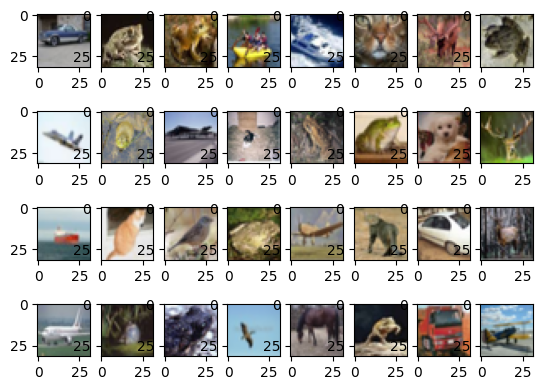

In [147]:
#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
num_rows = 4
num_cols = 8

for i in range(num_rows * num_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [148]:
# normalize
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255

In [149]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [1]
After conversion to categorical one-hot encoded labels:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


2. Model Architecture


In [14]:
# import tensorflow as tf

# tf.__version__

'2.17.0'

In [150]:
# data augmentation
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1)
    ]
)

In [151]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model
def cnn_model():
  model = Sequential()

  model.add(data_augmentation)

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  return model


# create the model
model = cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [152]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer= 'adam',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [153]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 50
    BATCH_SIZE:    int = 512

In [154]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2049 - loss: 2.1262 - val_accuracy: 0.3402 - val_loss: 1.7656
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3835 - loss: 1.6948 - val_accuracy: 0.3936 - val_loss: 1.7690
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4527 - loss: 1.5276 - val_accuracy: 0.5161 - val_loss: 1.3228
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4766 - loss: 1.4541 - val_accuracy: 0.5564 - val_loss: 1.2323
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5109 - loss: 1.3696 - val_accuracy: 0.4798 - val_loss: 1.5223
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5360 - loss: 1.2989 - val_accuracy: 0.6114 - val_loss: 1.0824
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5567 - loss: 1.2453 - val_accuracy: 0.5688 - val_loss: 1.2596
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5834 - loss: 1.1656 - val_accuracy: 0.5458 - v

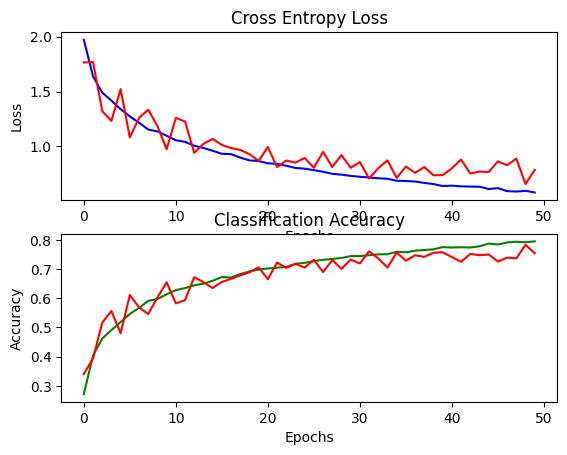

In [155]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


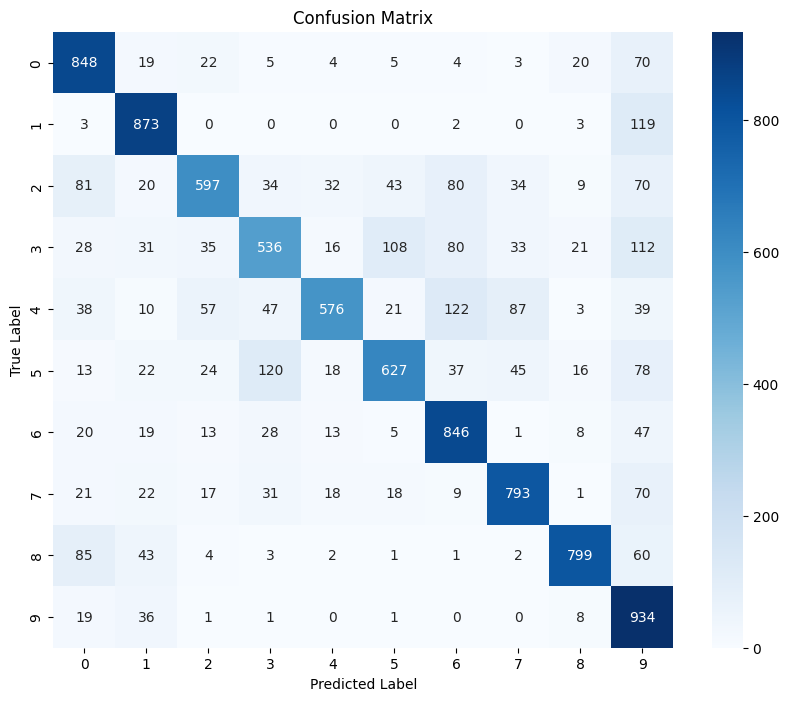

In [156]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [157]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7441 - loss: 0.8192
Test loss:  0.8243213891983032
Test accuracy:  0.742900013923645
